In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:\\Users\\oem\\datasets\\iris-dataset.xlsx", header = 0)


In [3]:
data = np.array(df, dtype=np.float32)

x_data = data[:, 0:-1]  

y_data = data[:, [-1]]
y_data = label_binarize(y_data, classes=[0, 1, 2])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [4]:
svm = OneVsRestClassifier(SVC(kernel='linear', C=10, gamma = 1))
y_score = svm.fit(x_train, y_train).decision_function(x_test)

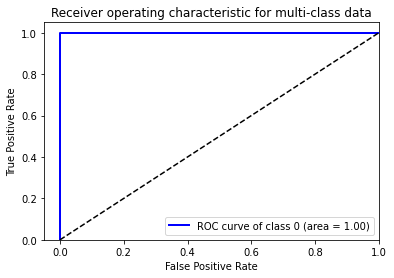

ROC: 1.0


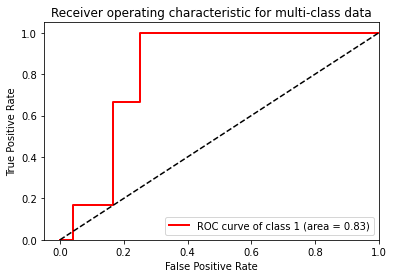

ROC: 0.8263888888888888


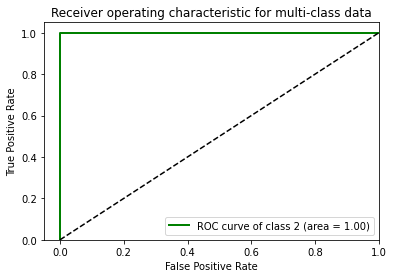

ROC: 1.0


In [39]:
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    print('ROC:', roc_auc[i])